##**Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

##**Load Dataset**

In [2]:
df = pd.read_excel('/content/Machine Learning (Jawaban) (1).xlsx')
df.head()

,Nama,Seberapa banyak NASI untuk porsi Anda?,Apa jenis LAUK yang paling sering Anda makan di kantin?,Berapa banyak porsi anda jika mengonsumsi SAYURAN?,Seberapa banyak porsi makan Anda dalam SATU HIDANGAN jika makan di kantin?,Bagaimana RASA makanan di kantin 5 menurut anda?,Apakah Anda ada KELUHAN dengan makanan yang disajikan di kantin 5? (Untuk Keluhan maksimal 3 kata),Menurut Anda seberapa HIGIENIS makanan yang ada di kantin 5?,Apakah Anda merasa HARGA makanan di kantin 5 terlalu mahal untuk kualitas dan porsi yang diberikan? Berikan kisaran harga yang sesuai dengan porsi makan anda,Apakah PELAYANAN di kantin 5 ramah dan memuaskan?,Apakah kantin 5 menyediakan MENU yang beragam dan sesuai dengan kebutuhan Anda?
0,kaita,Sedang,Daging Sapi,Sedang,Banyak,Enak,Hambar,5,21000,5,5
1,Ningrum,Sedikit,Sosis/Telur,Sedikit,Sedikit,Lumayan,Hambar,4,18000,5,5
2,Karin,Sedang,Daging Sapi,Sedang,Sedang,Enak,Tidak ada,5,21000,5,5
3,Rannum,Sedikit,Ayam,Sedikit,Sedikit,Lumayan,Hambar,5,21000,5,5
4,Lovish,Sedang,Ayam,Sedikit,Sedang,Enak,Tidak ada,4,25000,4,4


##**Data Cleaning**

###**Mengubah nama kolom**

In [3]:
# ubah nama kolom
df.rename(columns={"Seberapa banyak NASI untuk porsi Anda?": "porsi nasi", 
                   "Apa jenis LAUK yang paling sering Anda makan di kantin?": "jenis lauk",
                   "Berapa banyak porsi anda jika mengonsumsi SAYURAN?": "porsi konsumsi sayuran",
                   "Seberapa banyak porsi makan Anda dalam SATU HIDANGAN jika makan di kantin?": "porsi makan",
                   "Bagaimana RASA makanan di kantin 5 menurut anda?":"rasa makanan",
                   "Apakah Anda ada KELUHAN dengan makanan yang disajikan di kantin 5? (Untuk Keluhan maksimal 3 kata)":"keluhan",
                   "Menurut Anda seberapa HIGIENIS makanan yang ada di kantin 5?":"higienis rate",
                   "Apakah Anda merasa HARGA makanan di kantin 5 terlalu mahal untuk kualitas dan porsi yang diberikan? Berikan kisaran harga yang sesuai dengan porsi makan anda":"harga",
                   "Apakah PELAYANAN di kantin 5 ramah dan memuaskan?":"pelayanan",
                   "Apakah kantin 5 menyediakan MENU yang beragam dan sesuai dengan kebutuhan Anda?":"ketersediaan menu"},
          inplace=True)

In [4]:
df.head()

,Nama,porsi nasi,jenis lauk,porsi konsumsi sayuran,porsi makan,rasa makanan,keluhan,higienis rate,harga,pelayanan,ketersediaan menu
0,kaita,Sedang,Daging Sapi,Sedang,Banyak,Enak,Hambar,5,21000,5,5
1,Ningrum,Sedikit,Sosis/Telur,Sedikit,Sedikit,Lumayan,Hambar,4,18000,5,5
2,Karin,Sedang,Daging Sapi,Sedang,Sedang,Enak,Tidak ada,5,21000,5,5
3,Rannum,Sedikit,Ayam,Sedikit,Sedikit,Lumayan,Hambar,5,21000,5,5
4,Lovish,Sedang,Ayam,Sedikit,Sedang,Enak,Tidak ada,4,25000,4,4


###**Drop Irrelevant Columns**

Karena terdapat kolom yang tidak diperlukan, maka dari itu kita hapus terlebih dahulu kolom yang tidak diperlukan tersebut.

In [5]:
df = df.drop(columns = ['Nama'])
df.head()

,porsi nasi,jenis lauk,porsi konsumsi sayuran,porsi makan,rasa makanan,keluhan,higienis rate,harga,pelayanan,ketersediaan menu
0,Sedang,Daging Sapi,Sedang,Banyak,Enak,Hambar,5,21000,5,5
1,Sedikit,Sosis/Telur,Sedikit,Sedikit,Lumayan,Hambar,4,18000,5,5
2,Sedang,Daging Sapi,Sedang,Sedang,Enak,Tidak ada,5,21000,5,5
3,Sedikit,Ayam,Sedikit,Sedikit,Lumayan,Hambar,5,21000,5,5
4,Sedang,Ayam,Sedikit,Sedang,Enak,Tidak ada,4,25000,4,4


##**Eksploratory Data Analysis**

In [6]:
# Melihat informasi pada data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   porsi nasi              304 non-null    object
 1   jenis lauk              304 non-null    object
 2   porsi konsumsi sayuran  304 non-null    object
 3   porsi makan             304 non-null    object
 4   rasa makanan            304 non-null    object
 5   keluhan                 304 non-null    object
 6   higienis rate           304 non-null    int64 
 7   harga                   304 non-null    int64 
 8   pelayanan               304 non-null    int64 
 9   ketersediaan menu       304 non-null    int64 
dtypes: int64(4), object(6)
memory usage: 23.9+ KB


Terdapat data yang bertipe object sehingga nanti akan dilakukan encoding untuk mengkonversi data object menjadi numerik

In [7]:
# Melihat dimensi data
df.shape

(304, 10)

Terdapat 304 baris dan 10 kolom

###**Cek Missing Value**

In [8]:
df.isna().sum()

porsi nasi                0
jenis lauk                0
porsi konsumsi sayuran    0
porsi makan               0
rasa makanan              0
keluhan                   0
higienis rate             0
harga                     0
pelayanan                 0
ketersediaan menu         0
dtype: int64

<Axes: >

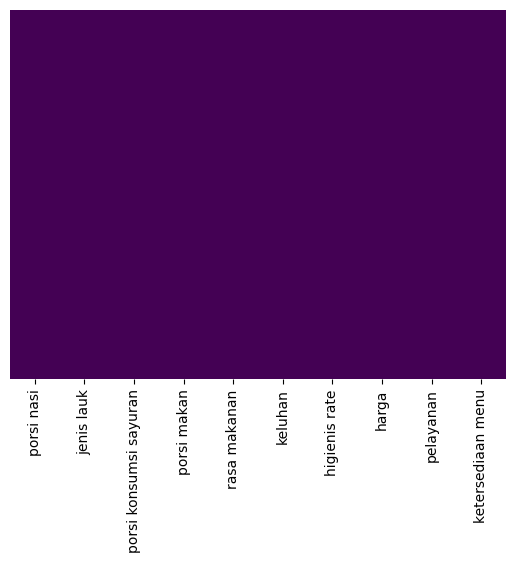

In [9]:
#Menyajikan visualisasi data
sns.heatmap(df.isnull(), cbar = False, yticklabels = False, cmap = 'viridis')

Bisa kita lihat bahwa pada dataset tersebut tidak terdapat missing value.

###**Cek Kondisi Data Target**

In [11]:
df['harga'].value_counts()

25000    224
21000     57
18000     23
Name: harga, dtype: int64

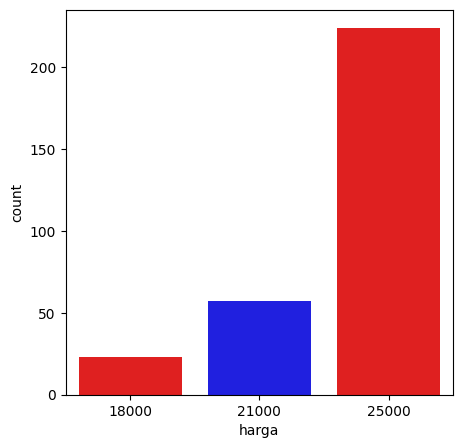

In [13]:
#Melihat keseimbangan data menggunakan diagram batang
plt.figure(figsize=(5,5))
colors = ['Red','Blue']
sns.countplot(x='harga', data=df, palette=colors)
plt.show()

Dari gambar di atas jelas bahwa distribusi data pada kelas-kelas di data target (harga) tidak seimbang. Lebih bagus jika setiap kelas distribusinya hampir sama atau seimbang.

##**Preprocesing Data**

###**Encoding Data**

In [23]:
# Konversi tipe object ke numerik
df['porsi nasi'] = df['porsi nasi'].astype('category')
df['jenis lauk'] = df['jenis lauk'].astype('category')
df['porsi konsumsi sayuran'] = df['porsi konsumsi sayuran'].astype('category')
df['porsi makan'] = df['porsi makan'].astype('category')
df['rasa makanan'] = df['rasa makanan'].astype('category')
df['keluhan'] = df['keluhan'].astype('category')
df['harga'] = df['harga'].astype('category')

# Melakukan encode
df['porsi nasi'] = df['porsi nasi'].cat.codes
df['jenis lauk'] = df['jenis lauk'].cat.codes
df['porsi konsumsi sayuran'] = df['porsi konsumsi sayuran'].cat.codes
df['porsi makan'] = df['porsi makan'].cat.codes
df['rasa makanan'] = df['rasa makanan'].cat.codes
df['keluhan'] = df['keluhan'].cat.codes
df['harga'] = df['harga'].cat.codes
df.head()

,porsi nasi,jenis lauk,porsi konsumsi sayuran,porsi makan,rasa makanan,keluhan,higienis rate,harga,pelayanan,ketersediaan menu
0,1,1,1,0,0,2,5,1,5,5
1,2,2,2,2,1,2,4,0,5,5
2,1,1,1,1,0,5,5,1,5,5
3,2,0,2,2,1,2,5,1,5,5
4,1,0,2,1,0,5,4,2,4,4


Ketetangan label harga :

*   0 = 18000
*   1 = 21000
*   2 = 25000



###**Normalisasi Data**

In [24]:
#Normalisasi data dengan MinMaxScaler
scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

df_norm.head()

,porsi nasi,jenis lauk,porsi konsumsi sayuran,porsi makan,rasa makanan,keluhan,higienis rate,harga,pelayanan,ketersediaan menu
0,0.5,0.5,0.5,0.0,0.0,0.285714,1.00,0.5,1.000000,1.000000
1,1.0,1.0,1.0,1.0,0.5,0.285714,0.75,0.0,1.000000,1.000000
2,0.5,0.5,0.5,0.5,0.0,0.714286,1.00,0.5,1.000000,1.000000
3,1.0,0.0,1.0,1.0,0.5,0.285714,1.00,0.5,1.000000,1.000000
4,0.5,0.0,1.0,0.5,0.0,0.714286,0.75,1.0,0.666667,0.666667


###**Split Dataset**

In [33]:
# Menentukan variabel independent dan dependent
y = df['harga']
X = df_norm.drop(columns=['harga'])

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [47]:
print('Jumlah data traing adalah:', len(X_train))
print('Jumlah data testing adalah:', len(X_test))

Jumlah data traing adalah: 243
Jumlah data testing adalah: 61


##**Modelling**

###**Klasifikasi menggunakan metode SVM**

In [48]:
svm = SVC(random_state=0)
svm.fit(X_train, y_train)

SVC(random_state=0)

In [49]:
print("Akurasi Training: {:.2f}%".format(svm.score(X_train, y_train)*100))
print("Akurasi Testing: {:.2f}%".format(svm.score(X_test, y_test)*100))

Akurasi Training: 81.89%
Akurasi Testing: 75.41%


In [50]:
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.54      0.50      0.52        14
           2       0.81      0.89      0.85        44

    accuracy                           0.75        61
   macro avg       0.45      0.46      0.46        61
weighted avg       0.71      0.75      0.73        61



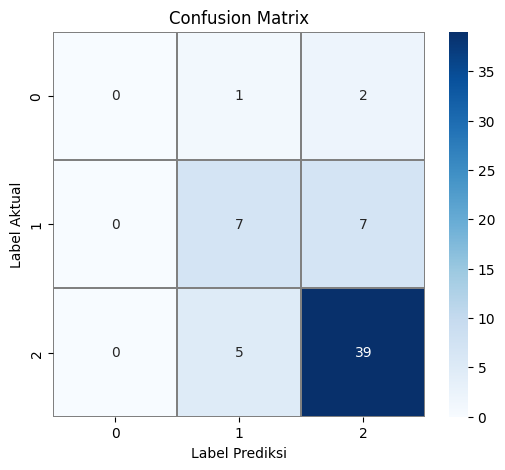

In [51]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)  

f, ax = plt.subplots(figsize=(6, 5))      
sns.heatmap(cm,                  
            annot=True, 
            linewidths=0.01,    
            cmap="Blues",                
            linecolor="gray",     
            fmt='.0f',                 
            ax=ax)
plt.xlabel("Label Prediksi")          
plt.ylabel("Label Aktual")          
plt.title("Confusion Matrix")        
plt.show()    